# Project: "No-show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Patients visit the hospitals in their neighbourhoods on a scheduled day and details of their health condition are captured and then allocated an appointment day on when to meet the doctor.\
> This dataset collects information from over 110k mediacl appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.\
> a. PatientId - Patient identification.\
> b. AppointmentID - Appointment identification.\
> c. Gender - Patient gender (Male or Female).\
> d. ScheduledDay - The day patient set up their appointment.\
> e. AppointmentDay - The day of actual appointment when patient have to visit the doctor.\
> f. Neighborhood indicates the location of the hospital.\
> g. Age = How old is the patient.\
> i. Hipertension = True or False\
> j. Diabetes= True or False.\
> k. Alcoholism = addiction to the consumption of alcoholic True or False.\
> l. Handcap = True or False.\
> m. SMS_received = 1 or more messages sent to the patient.\
> n. No-show = ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.\
> j. Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.\
> All these details are captured and stored in a spreadsheet to help the hospital understand the following questions.
> 1. What factors influence more of the decision for the patients not to show up for the appointment or to show up for the appointment?
> 2. is the difference between the scheduled day and appointment day a major factor for whether a patient shows up for the appointment or not?
> 3. Does the recieving of an SMS by a patient determine whether the patient shows up for the appointment or not?
> 4. Does the health condition of the patient determine whether the patient shows up for the appointment or not?
> 5. Whether the patient has a scholarship, is it determinant for the patient to show up for the appointment?
> 6. What is the most common disease among people scheduled for appointment ?
> 7. Which of males and females are more committed to attending appointment?
> 8. What is the ratio of people attending/missing appointment?
> 9. Does Age affect the attendance?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Could not fetch URL https://pypi.org/simple/pandas/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pandas/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1129)'))) - skipping


ERROR: Could not find a version that satisfies the requirement pandas==0.25.0 (from versions: none)
ERROR: No matching distribution found for pandas==0.25.0


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pf = pd.read_csv("C:/Users/tturyarugayo/Downloads/noshowappointments-kagglev2-may-2016.csv")
pf.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# understand the different metrics of each variable(column)
pf.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# understand the different data types 
pf.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#count of missing values per column
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#check for null values
pf.isnull().sum().any()

False

In [8]:
# check for duplicates in the dataset
sum(pf.duplicated())

0

## key observations!!!

> 1. Age has a minimum value of -1 which is unrealistic.
> 2. There are no missing values in the data.
> 3. The data has no duplicates.

### Data cleaning procedure
> 1. Rename the columns to lower case and apply correct formatting.
> 2. Change the no-show column data to 0 and 1.
> 3. Change the date format such that you can use numerical operators on the date.
> 4. Drop columns that are not relevant for analysis.
> 5. Delete data from the age column where age < 0.


In [9]:
# Dropping patient ID and appointment ID
pf.drop(['PatientId', 'AppointmentID'], axis=1 , inplace= True)

In [10]:
pf.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#rename columns to lowercase to avoid always remembering the names
pf.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-","_"), inplace=True)

In [12]:
#confirm changes
pf.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# replace the values yes and no in the no_show column to ) and 1
pf = pf.replace({'no_show': {'Yes': 0, 'No': 1}})

In [14]:
#confirm changes
pf.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [15]:
# change data format and compute the difference between the schedule day and appointment day.
pf['scheduledday'] = pd.to_datetime(pf['scheduledday'])
pf['appointmentday'] = pd.to_datetime(pf['appointmentday'])
pf['appointmentday'] = pf['appointmentday'].where(pf['appointmentday']
                                                  .dt.time != datetime.time(0),(pf['appointmentday']-pd.to_timedelta('1s')))
pf['day'] = (pf['appointmentday'] -pf['scheduledday']).dt.days

In [16]:
#confirm changes
pf.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day
0,F,2016-04-29 18:38:08+00:00,2016-04-28 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-28 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-28 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-28 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-28 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,-1


In [17]:
# delete negative age
rindx=pf[pf['age'] == -1].index
pf.drop(rindx, inplace=True)

In [18]:
#confirm changes
pf.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

### 1. What factors influence more of the decision for the patients not to show up for the appointment or to show up for the appointment?

array([[<AxesSubplot:title={'center':'scheduledday'}>,
        <AxesSubplot:title={'center':'appointmentday'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hipertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handcap'}>,
        <AxesSubplot:title={'center':'sms_received'}>],
       [<AxesSubplot:title={'center':'no_show'}>,
        <AxesSubplot:title={'center':'day'}>, <AxesSubplot:>]],
      dtype=object)

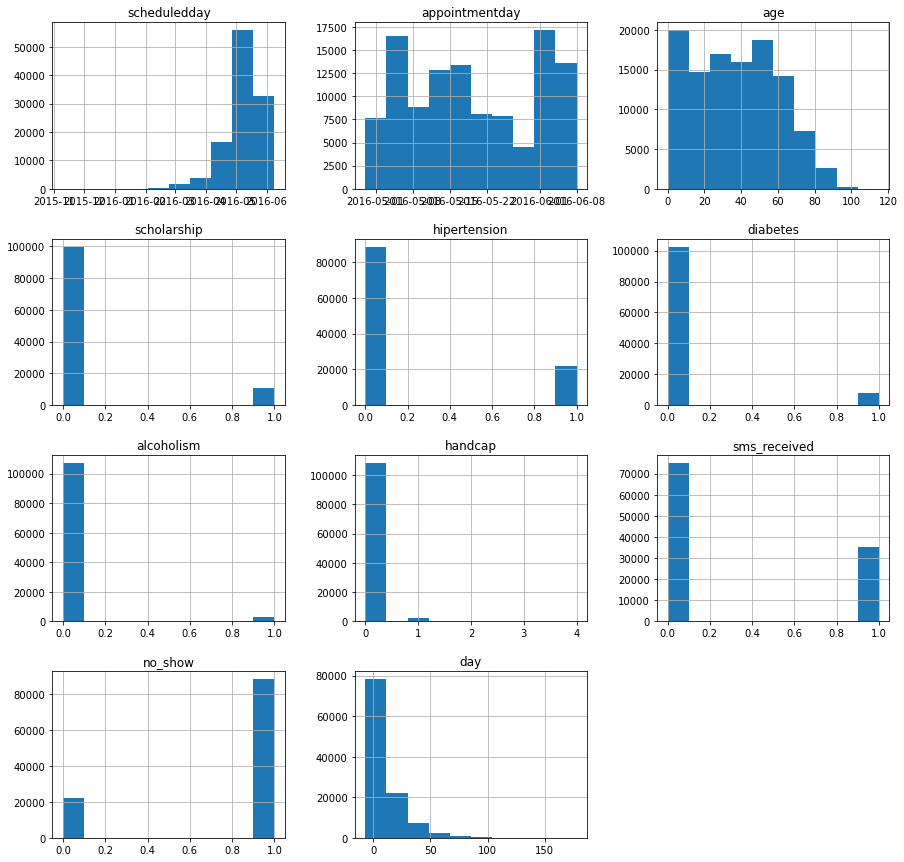

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
pf.hist(figsize = (15,15))

### 2. Which of males and females visit the doctor more regularly?

In [20]:
pf_show = pf.query("no_show == 1")
pf_no_show = pf.query("no_show == 0")

In [21]:
def varmean (pf,x,column):
    """
    This function to calculate proportions for specific columns using groupby and value counts
    and returns the proportions if all input data are correct
    - df : dataframe which contains all patients who attended and didn't
    - x : list which contains columns names that we need to groupby (groupby will be sorted as the same lst values sort)
    - column :string with specific column name (which we want to calculate proportion according to it)
    OUTPUT:
    - proportion : it's a pandas Series that contains grouped by lst values and propotions according to col
    """
    varmean = pf.groupby(x)[column].value_counts(normalize=True).unstack(column)
    return varmean

In [22]:
pf.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [23]:
#obtain proportion of males and females
female_ratio = pf.gender.value_counts()[0] / pf.shape[0]
print(female_ratio)
male_ratio = pf.gender.value_counts()[1] / pf.shape[0]
print(male_ratio)

0.6499737618297957
0.3500262381702043


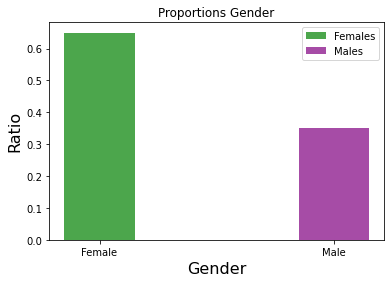

In [24]:
#plot a graph of the proportions of male and female

female_bar = plt.bar(0, female_ratio, width=.3, alpha=0.7, color ='green', label='Females' )
male_bar = plt.bar(1, male_ratio, width=.3, alpha=0.7, color='purple', label='Males')

#labels and title

plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Ratio', fontsize=16)
plt.title('Proportions Gender');
plt.legend();

#### Conclusion: Females visit the doctor more than the males.

### 3. What is the percentage of patients showing up and not showing up for appointment?

In [25]:
# checking number of patients who attended and didn't attend
ratio= pf.no_show.value_counts()
ratio

1    88207
0    22319
Name: no_show, dtype: int64

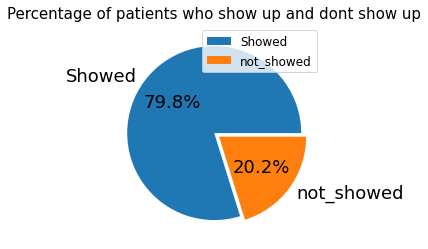

In [26]:
# Pie chart displays how many patient attended to appointment and how many didn't

plt.pie(ratio,labels=["Showed", "not_showed"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.07))
plt.rcParams['font.size'] = 12
plt.title("Percentage of patients who show up and dont show up",fontsize=15)
plt.legend()
plt.show()

#### Conclusion: 79.8% of the patients showed up for their appointments and 20.2% of the patients did not show up. 

### 4. Which of males and females are more committed to meeting appointments?

In [27]:
# Proportion of females and males as they respond to appointments
# filter the dataset by gender and count of showup and not_showup
varmean(pf_show,["no_show"],"gender")

gender,F,M
no_show,,
1,0.648985,0.351015


In [28]:
# group by gender and find the mean value of show rate
pf.groupby('gender')['no_show'].mean()

gender
F    0.796851
M    0.800321
Name: no_show, dtype: float64

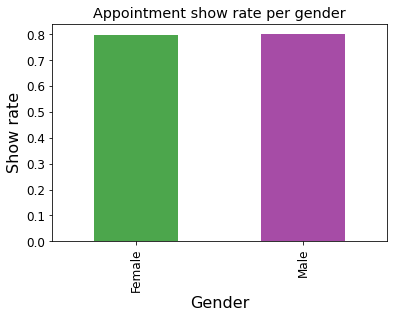

In [29]:
# show rate bar chart with one bar for Females (F) and one bar for Males (M).

pf.groupby('gender')['no_show'].mean().plot(kind='bar', alpha=.7, color=['green', 'purple']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Show rate', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title('Appointment show rate per gender');

#### Conclusion: On average both males and females had the same percentage of show up, both averaging approximately 80%. Implying 80% of males showed up for the appointment and 80% of the females showed up for the appointment.

In [30]:
show_up = pf.no_show == True
not_show = pf.no_show == False
showup = show_up.mean()
print(showup)
notshow = not_show.mean()
print(notshow)

0.7980656135208005
0.20193438647919945


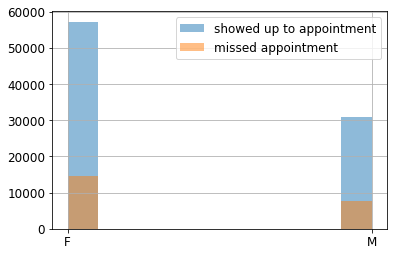

In [31]:
pf.gender[show_up].hist(alpha=0.5, label = 'showed up to appointment')
pf.gender[not_show].hist(alpha=0.5, label = 'missed appointment');
plt.legend();

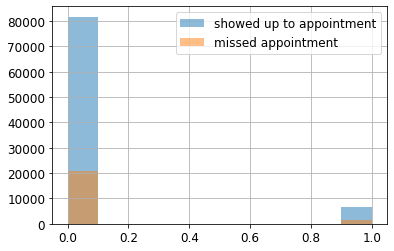

In [32]:
pf.diabetes[show_up].hist(alpha=0.5, label = 'showed up to appointment')
pf.diabetes[not_show].hist(alpha=0.5, label = 'missed appointment');
plt.legend();

#### Conclusion: Basing on the above graph, Females have more patients than males though proportionally, the show up for appointments is roughly the same.

### 5. Which age is most affected by disease (hipertension, diabetes, alcoholism, handicap)?

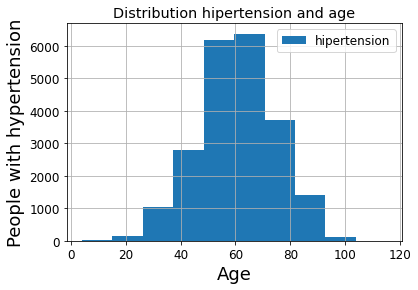

In [33]:
# create a plot chart for the hipertesnion and age

pf.age[pf.hipertension == 1].hist(bins = 10, label = 'hipertension' );
plt.title('Distribution hipertension and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with hypertension', fontsize=18);
plt.legend();

#### Conclusion: The age group between 45 and 65 are the most affected by hypertension.

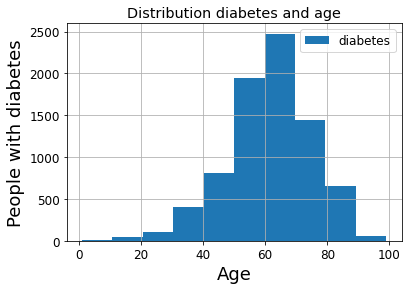

In [34]:
# create a plot chart for the diabetes and age

pf.age[pf.diabetes == 1].hist(bins = 10, label = 'diabetes' );
plt.title('Distribution diabetes and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with diabetes', fontsize=18);
plt.legend();

#### Conclusion: The age group between 60 and 65 years are the most affected by diabetes and its more common as the age increases since its positively skewed.

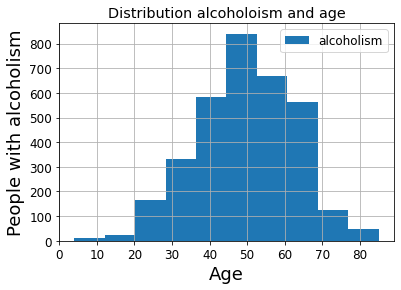

In [35]:
pf.age[pf.alcoholism == 1].hist(bins = 10, label = 'alcoholism' );
plt.title('Distribution alcoholoism and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with alcoholism', fontsize=18);
plt.legend();

#### Conclusion: The age group between 45 and 55 years are the most affected by alcoholism and its more common as the age increases since its skewed to the right.

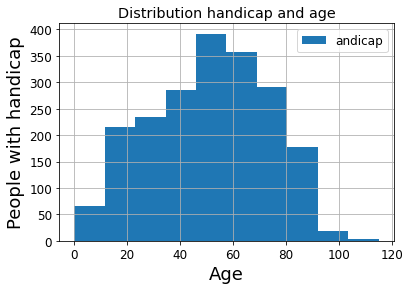

In [36]:
# create a plot for the handicap and age

pf.age[pf.handcap == 1].hist(bins = 10, label = 'andicap' );
plt.title('Distribution handicap and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with handicap', fontsize=18);
plt.legend();

#### Conclusion: The age group between 50 and 60 years are the most affected by handicap and this is highly skewed to younger ages

### 6. Does age affect showing up?

In [37]:
# understand the age data against show up rate.
pf[['no_show', 'age']].describe()

,no_show,age
count,110526.000000,110526.000000
mean,0.798066,37.089219
std,0.401445,23.110026
min,0.000000,0.000000
25%,1.000000,18.000000
50%,1.000000,37.000000
75%,1.000000,55.000000
max,1.000000,115.000000


In [38]:
# bin edges that will be used to cut the data into gruoups
bin_edges = [-1, 2, 12, 19, 39, 59, 115 ]
#bin_edges = [-1, 18, 37, 55, 115]
#labels for the age categories
bin_names = ['infants', 'children', 'teens', 'youth', 'adults', 'elders']
#bin_names = ['children', 'youth', 'adults', 'seniors']
pf['age_group'] = pd.cut(pf['age'], bin_edges, labels=bin_names)


# check all samples are included - should be True
pf.shape[0] == pf.query('age_group == "infants"').age.count() + pf.query('age_group == "children"').age.count()+ pf.query('age_group == "teens"').age.count()+ pf.query('age_group == "youth"').age.count()+ pf.query('age_group == "adults"').age.count() + pf.query('age_group == "elders"').age.count()

True

In [39]:
# Use groupby to get the mean quality for each age group.
age_group_show_means = pf.groupby('age_group')['no_show'].mean()
age_group_show_means

age_group
infants     0.824226
children    0.779436
teens       0.740373
youth       0.768618
adults      0.811918
elders      0.846880
Name: no_show, dtype: float64

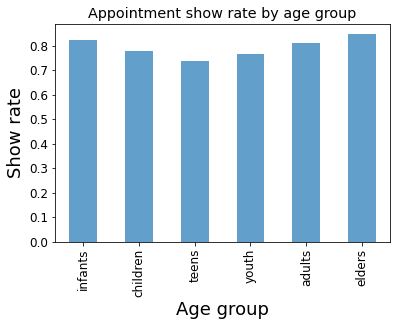

In [40]:
# show rate bar chart age group and show up rate.

pf.groupby('age_group')['no_show'].mean().plot(kind='bar', alpha=.7);

# title and labels
plt.xticks([0, 1, 2, 3, 4, 5] , ['infants', 'children', 'teens', 'youth', 'adults', 'elders'])
plt.title('Appointment show rate by age group');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Age group', fontsize=18);

#### Conclusion: The elders, infants and adults have a higher show up rate on average as compared to other age groups. 

### 7. What is the proportions of sms received and how does it affect show up rate?

In [41]:
# understand the metrics of the sms recieved.
varmean(pf_show,["no_show"],"sms_received")

sms_received,0,1
no_show,,
1,0.708663,0.291337


In [42]:
# Obtain proprotion of the sms recieved
sms_prop = pf.sms_received.value_counts()[0] / pf.shape[0]
print(sms_prop)
no_sms_prop = pf.sms_received.value_counts()[1] / pf.shape[0]
print(no_sms_prop)

0.6789714637279916
0.3210285362720084


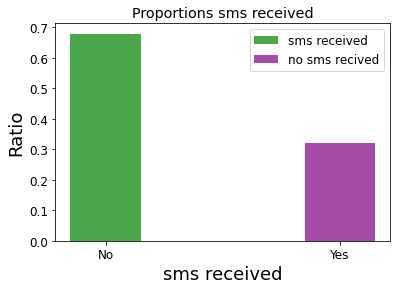

In [44]:
# plot a bar graph to show SMS recieved proportions.
sms_bar = plt.bar(0, sms_prop, width=.3, alpha=0.7, color ='green', label='sms received' )
no_sms_bar = plt.bar(1, no_sms_prop, width=.3, alpha=0.7, color='purple', label='no sms recived')

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('sms received', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions sms received');
plt.legend();

In [45]:
# compare the SMS received to show up status
pf.groupby('sms_received')['no_show'].mean()

sms_received
0    0.832965
1    0.724255
Name: no_show, dtype: float64

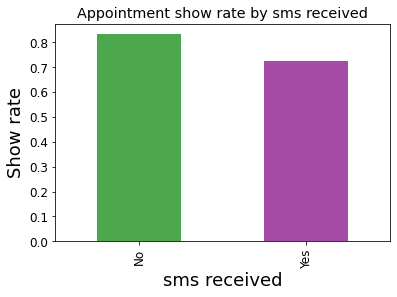

In [46]:
# show rate bar chart with sms received

pf.groupby('sms_received')['no_show'].mean().plot(kind='bar', alpha=.7, color=['green', 'purple']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by sms received');
plt.xlabel('sms received', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

#### Conclusion: People who do not recieve SMS are more likely to show up than people who recieve SMS.

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> 1. Females go to the doctor more often than males - 65% of females but 35 % of males.
> 2. Gender doesn not affect show up for appointments since they both average the same turnup of 80%.
> 3. The age group between 45 and 65 are the most affected by hypertension.
> 4. The age group between 60 and 65 years are the most affected by diabetes and its more common as the age increases since its positively skewed.
> 5. The age group between 45 and 55 years are the most affected by alcoholism and its more common as the age increases since its skewed to the right.
> 6. The age group between 50 and 60 years are the most affected by handicap and this is highly skewed to younger ages.
> 7. The elders, infants and adults have a higher show up rate on average as compared to other age groups.
> 8. Receiving sms appears to be ineffective to improve the medical appointment show up rate.

## Limitations
> 1. Age column has -one row with value(-1 years0 which isn't logical and 5 more rows with value (115 years ) wich is confusing.
> 2. No show column values is No for attended and yes for didnt attend and it was confusing.

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295